# Assignment 5: Multi-dimensional Unconstrained Optimization

The main objective the experiment is to evaluate the maximum value of the two-dimensional function defined as: 
$f(x,y)=2xy+2x-x^{2}-2y^{2}$. The method that is applied here is: random search method which is non-gradient(direct) method for multi-dimensional unconstrained optimization.

In [ ]:
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Firstly, the function whose the maximum value will be calculated is defined as follows:

In [ ]:
def f(x,y):
    return 2*x*y+2*x-x*x-2*y*y

Secondly, in order to properly estimate the maximum value, the graph of the function can be plotted. Below is the Contour plot which gives the idea about the range of $x$ and $y$.

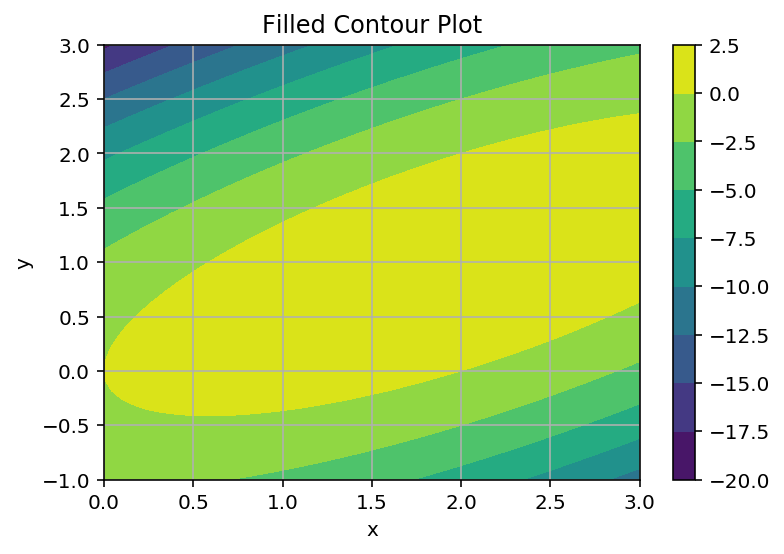

In [ ]:
x = np.linspace(0.0, 3.0, 50)
y = np.linspace(-1.0, 3.0, 50)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

The maximum value of the function was estimated by using two formulas for (x, y): 
                                           $$x_i=x_l+(x_u-x_l)r$$
                                           $$y_i=y_l+(y_u-y_l)r$$
Where we let $x_u=3$, $x_l=0$ and $y_u=2$, $y_l=-1$ and $r$ is random number from [0,1].

In [ ]:
def maximum(N): # N- number of trials
    maxf=-1e9  #stores maximum value from among random trials    
    n=[]
    e=[]
    zm=[]  #values of maximum value of the function
    for j in range(1,N):
        r=rn.random()    
        x=0+3*r
        y=-1+3*r
        z=f(x,y)
        if maxf<z:             
            maxf=z            
            maxx=x    #corresponding x and y values for maximum value
            maxy=y 
        n.append(j)
        zm.append(z) 
        std = np.std(zm)
        ea=std/np.sqrt(j)  #standard error
        e.append(ea)
        ed=1/np.sqrt(N) 
    return zm, e, ed    #returns maximum value of the function and error

Error was calculated using standard error formula: $$ed=\frac{std}{\sqrt{N}}$$
where, ed - standard error, std - standard deviation, N- number of trials. 
Indeed, this also satisfies the fact that error decreases by $\frac{1}{\sqrt{N}}$. 

                                                     Conclusion:
Finally, the objective of the experiment was achieved: the maximum value of the given function was estimated using random search method. It showed that the maximum value of the function is approximately equal to 2. It was found that the value of maximum is obtained with much better precision with more number of iterations. If we consider n=1000 and n=10000, in the second one we get the value of maximum much better. In the random seacrh method, the error decreases by $\frac{1}{\sqrt{N}}$ which is considered to be very slow. In the function, the error of the maximum value was checked using two approaches: by the formula and standard deviation.
Based on the experiment, it can be shown that this method always works, even for discontinuous and nondifferentiable functions. However, the main drawback of the method is its inefficiency in terms of time. Also, it does not consider the behavior of the underlying function (slope, direction etc.). 